In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('car_prices.csv', on_bad_lines='skip')

In [4]:
df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,"kia motors america, inc",20500,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,"kia motors america, inc",20800,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,4.5,1331.0,gray,black,financial services remarketing (lease),31900,30000,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,4.1,14282.0,white,black,volvo na rep/world omni,27500,27750,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,4.3,2641.0,gray,black,financial services remarketing (lease),66000,67000,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


In [5]:
df.isna().sum()

year                0
make            10301
model           10399
trim            10651
body            13195
transmission    65353
vin                 0
state               0
condition       11794
odometer           94
color             749
interior          749
seller              0
mmr                 0
sellingprice        0
saledate            0
dtype: int64

In [6]:
df.duplicated().sum()

0

# There are no duplicates in this dataset

In [7]:
df.dtypes

year              int64
make             object
model            object
trim             object
body             object
transmission     object
vin              object
state            object
condition       float64
odometer        float64
color            object
interior         object
seller           object
mmr               int64
sellingprice      int64
saledate         object
dtype: object

In [8]:
df.nunique()

year                34
make                96
model              973
trim              1975
body                86
transmission         2
vin             550296
state               38
condition           41
odometer        172277
color               20
interior            17
seller           14264
mmr               1101
sellingprice      1887
saledate          3745
dtype: int64

In [9]:

df.describe()

,year,condition,odometer,mmr,sellingprice
count,558811.000000,547017.000000,558717.000000,558811.000000,558811.000000
mean,2010.038696,3.424512,68323.195797,13769.324646,13611.262461
std,3.966812,0.949439,53397.752933,9679.874607,9749.656919
min,1982.000000,1.000000,1.000000,25.000000,1.000000
25%,2007.000000,2.700000,28374.000000,7100.000000,6900.000000
50%,2012.000000,3.600000,52256.000000,12250.000000,12100.000000
75%,2013.000000,4.200000,99112.000000,18300.000000,18200.000000
max,2015.000000,5.000000,999999.000000,182000.000000,230000.000000


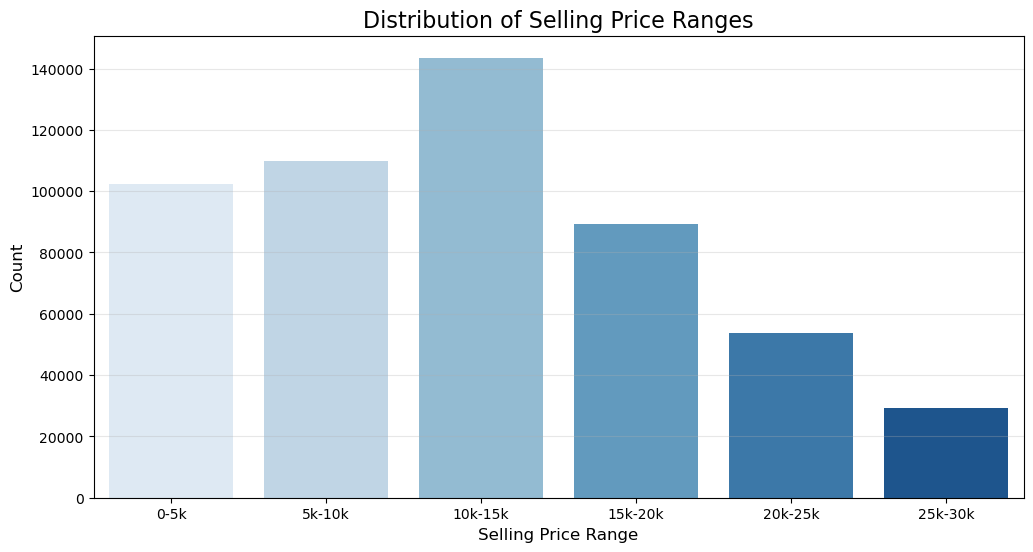

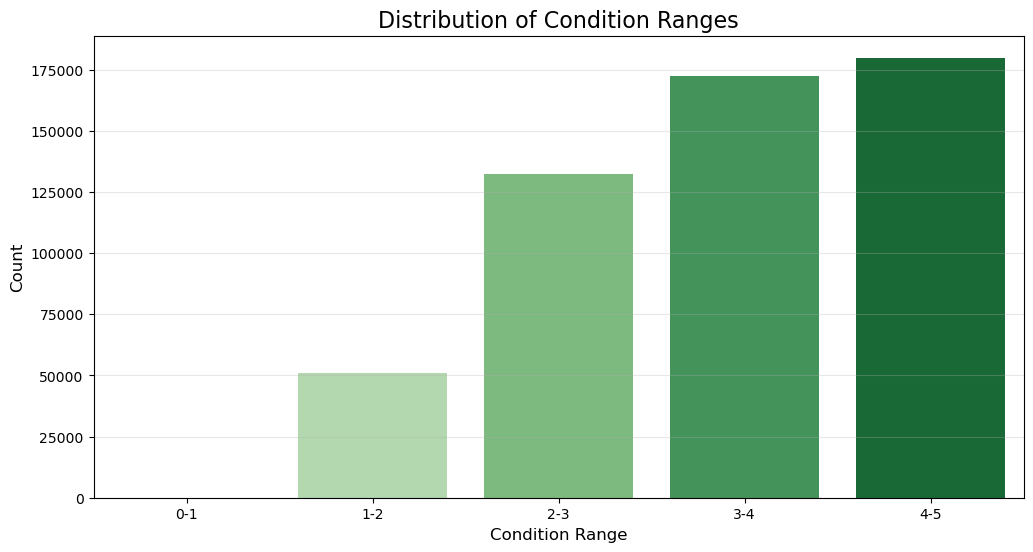

In [10]:
selling_price_bins = [0, 5000, 10000, 15000, 20000, 25000, 30000]
selling_price_labels = ["0-5k", "5k-10k", "10k-15k", "15k-20k", "20k-25k", "25k-30k"]

condition_bins = [0, 1, 2, 3, 4, 5]
condition_labels = ["0-1", "1-2", "2-3", "3-4", "4-5"]

df['sellingprice_range'] = pd.cut(df['sellingprice'], bins=selling_price_bins, labels=selling_price_labels, right=False)
df['condition_range'] = pd.cut(df['condition'], bins=condition_bins, labels=condition_labels, right=False)

# Plotting Selling Price Range Histogram
plt.figure(figsize=(12, 6))
sns.countplot(x='sellingprice_range', data=df, palette='Blues', order=selling_price_labels)
plt.title('Distribution of Selling Price Ranges', fontsize=16)
plt.xlabel('Selling Price Range', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.show()

# Plotting Condition Range Histogram
plt.figure(figsize=(12, 6))
sns.countplot(x='condition_range', data=df, palette='Greens', order=condition_labels)
plt.title('Distribution of Condition Ranges', fontsize=16)
plt.xlabel('Condition Range', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.show()



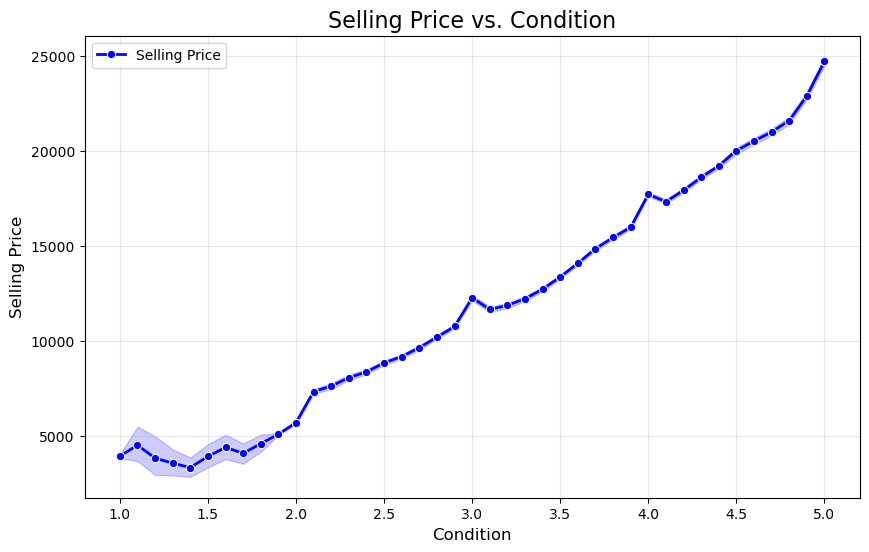

In [11]:
# Plotting Selling Price vs. Condition as a Line Graph

plt.figure(figsize=(10, 6))
sns.lineplot(x='condition', y='sellingprice', data=df, color='blue', marker='o', linewidth=2, label='Selling Price')

plt.title('Selling Price vs. Condition', fontsize=16)
plt.xlabel('Condition', fontsize=12)
plt.ylabel('Selling Price', fontsize=12)
plt.grid(alpha=0.3)
plt.legend()
plt.show()

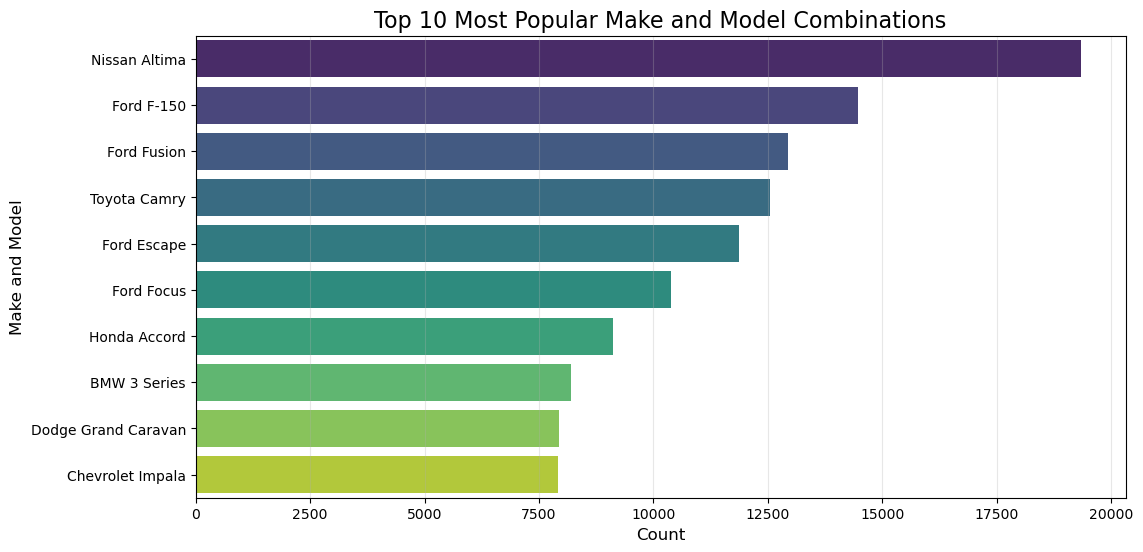

In [12]:

# Plot to visualize Most Popular Make and Model Combination

df['make_model'] = df['make'] + " " + df['model']

make_model_counts = df['make_model'].value_counts().reset_index()
make_model_counts.columns = ['make_model', 'count']

plt.figure(figsize=(12, 6))
sns.barplot(x='count', y='make_model', data=make_model_counts.head(10), palette='viridis')
plt.title('Top 10 Most Popular Make and Model Combinations', fontsize=16)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Make and Model', fontsize=12)
plt.grid(axis='x', alpha=0.3)
plt.show()

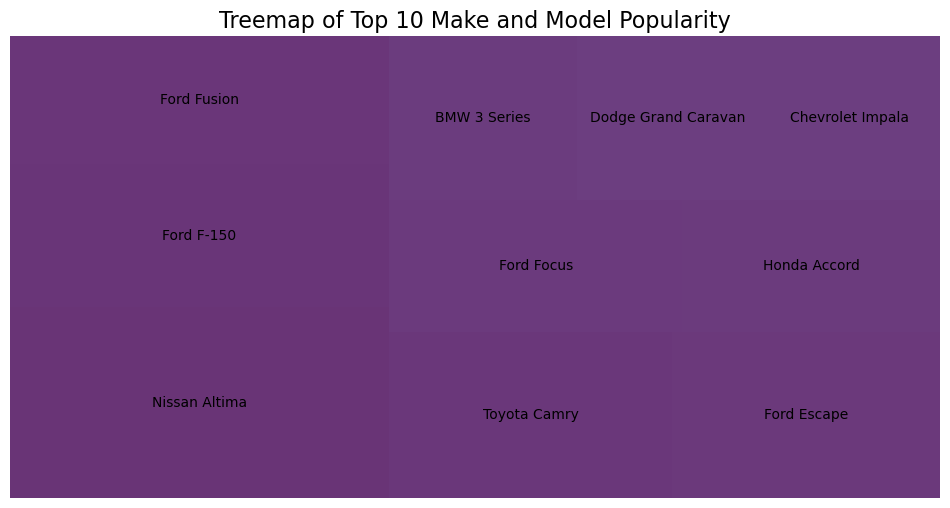

In [13]:
# Treemap plot for top 10 make-model combinations

import squarify 

plt.figure(figsize=(12, 6))
squarify.plot(
    sizes=make_model_counts['count'].head(10), 
    label=make_model_counts['make_model'].head(10), 
    alpha=0.8, 
    color=plt.cm.viridis(range(10))
)
plt.title('Treemap of Top 10 Make and Model Popularity', fontsize=16)
plt.axis('off')
plt.show()

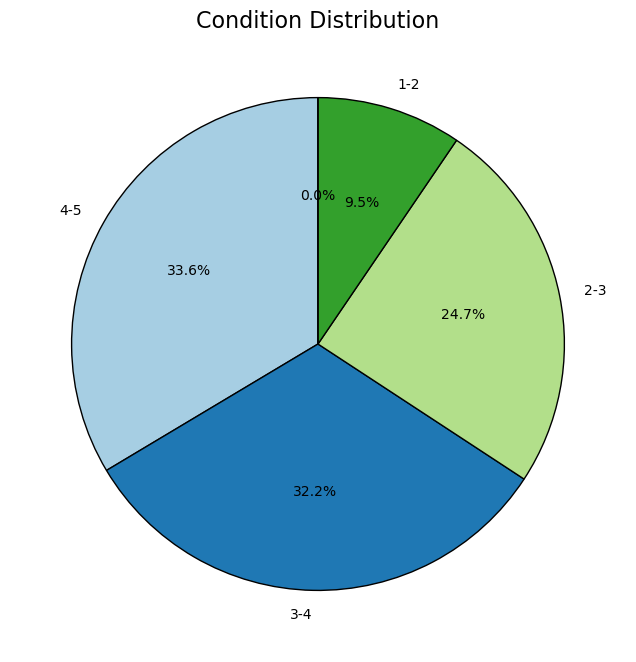

In [14]:
# Plot to visualize Condition Distribution

condition_bins = [0, 1, 2, 3, 4, 5]
condition_labels = ["0-1", "1-2", "2-3", "3-4", "4-5"]
df['condition_range'] = pd.cut(df['condition'], bins=condition_bins, labels=condition_labels, right=False)

condition_counts = df['condition_range'].value_counts()

plt.figure(figsize=(8, 8))
condition_counts.plot(kind='pie', autopct='%1.1f%%', colors=plt.cm.Paired.colors, startangle=90, wedgeprops={'edgecolor': 'black'})
plt.title('Condition Distribution', fontsize=16)
plt.ylabel('') 
plt.show()

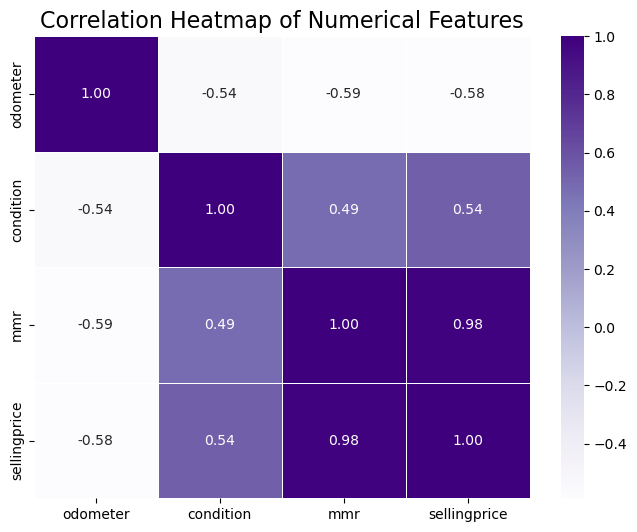

In [15]:
# Plot to explore Correlation Heatmap of Numerical Features

numerical_features = ['odometer', 'condition', 'mmr', 'sellingprice']
corr_matrix = df[numerical_features].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='Purples', fmt='.2f', linewidths=0.5, cbar=True)
plt.title('Correlation Heatmap of Numerical Features', fontsize=16)
plt.show()

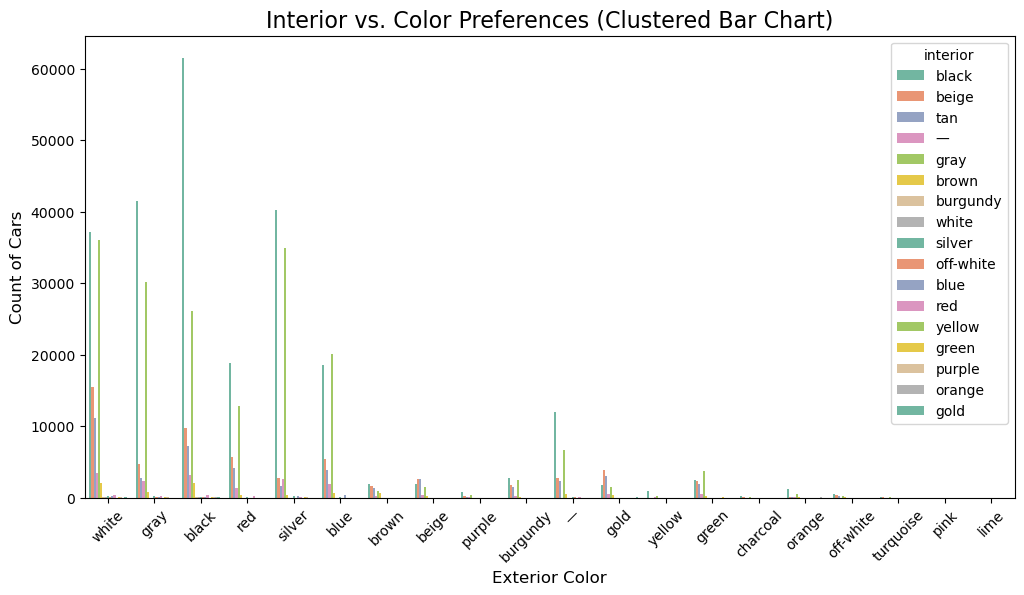

In [16]:
# Count Plot to visualize Interior vs. Color Preferences

plt.figure(figsize=(12, 6))
sns.countplot(x='color', hue='interior', data=df, palette='Set2')

plt.title('Interior vs. Color Preferences (Clustered Bar Chart)', fontsize=16)
plt.xlabel('Exterior Color', fontsize=12)
plt.ylabel('Count of Cars', fontsize=12)
plt.xticks(rotation=45)
plt.show()

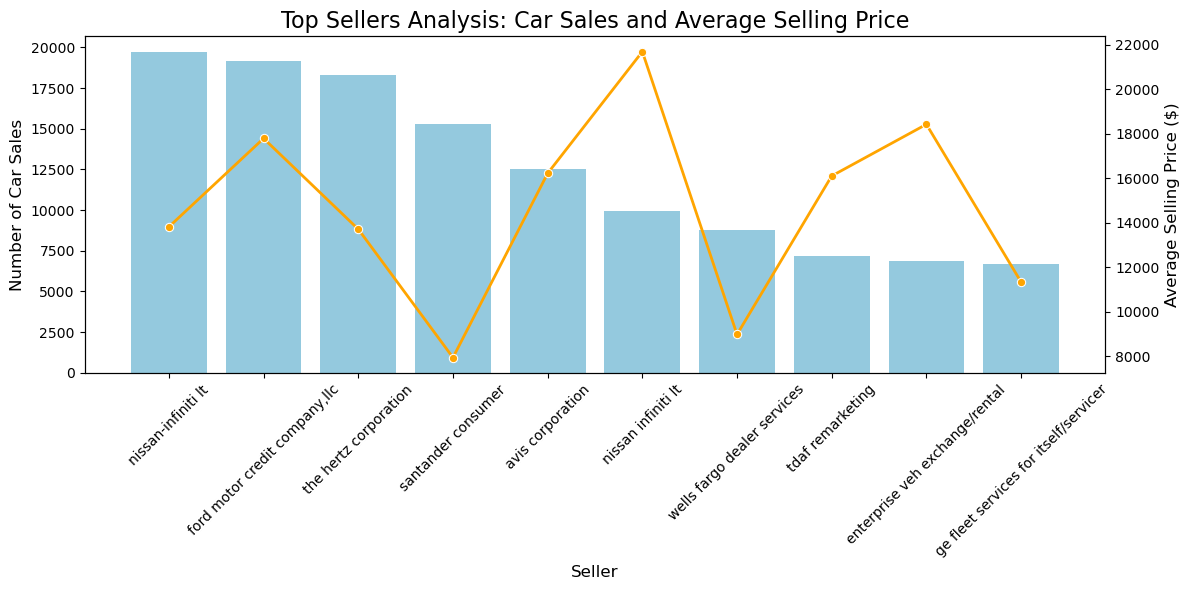

In [17]:

# plot to compare Car Sales and Average Selling Price

seller_sales = df.groupby('seller').agg(
    car_sales=('seller', 'size'),
    avg_sellingprice=('sellingprice', 'mean')
).reset_index()

top_sellers = seller_sales.sort_values(by='car_sales', ascending=False).head(10)

fig, ax1 = plt.subplots(figsize=(12, 6))

sns.barplot(x='seller', y='car_sales', data=top_sellers, ax=ax1, color='skyblue')
ax1.set_xlabel('Seller', fontsize=12)
ax1.set_ylabel('Number of Car Sales', fontsize=12)
ax1.set_title('Top Sellers Analysis: Car Sales and Average Selling Price', fontsize=16)
ax1.tick_params(axis='x', rotation=45) 

ax2 = ax1.twinx()
sns.lineplot(x='seller', y='avg_sellingprice', data=top_sellers, ax=ax2, color='orange', marker='o', linewidth=2)
ax2.set_ylabel('Average Selling Price ($)', fontsize=12)

plt.tight_layout()
plt.show()

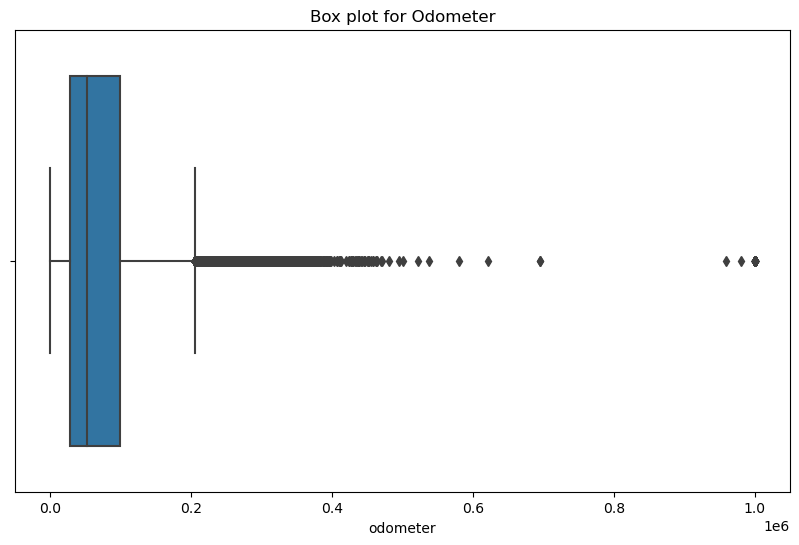

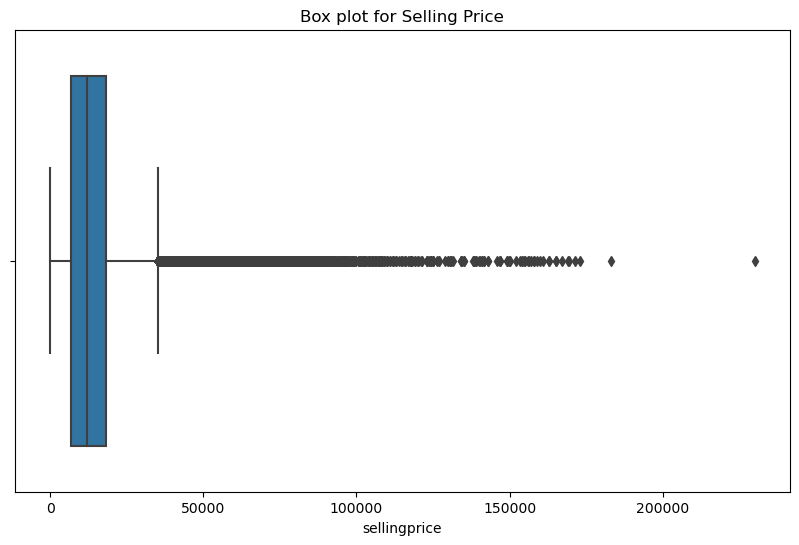

In [18]:
# Outlier Detection with Box Plots and Z-Scores

# Box plot for 'odometer' column
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['odometer'])
plt.title('Box plot for Odometer')
plt.show()

# Box plot for 'sellingprice' column
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['sellingprice'])
plt.title('Box plot for Selling Price')
plt.show()

# Data Preprocessing for model development

In [19]:
# Check for Missing Values

missing_values = df.isnull().sum()
print(missing_values)

year                      0
make                  10301
model                 10399
trim                  10651
body                  13195
transmission          65353
vin                       0
state                     0
condition             11794
odometer                 94
color                   749
interior                749
seller                    0
mmr                       0
sellingprice              0
saledate                  0
sellingprice_range    30746
condition_range       23016
make_model            10399
dtype: int64


In [20]:
# Percentage of missing values

missing_percentage = (df.isnull().sum() / len(df)) * 100
print(missing_percentage)

year                   0.000000
make                   1.843378
model                  1.860915
trim                   1.906011
body                   2.361263
transmission          11.695010
vin                    0.000000
state                  0.000000
condition              2.110553
odometer               0.016821
color                  0.134035
interior               0.134035
seller                 0.000000
mmr                    0.000000
sellingprice           0.000000
saledate               0.000000
sellingprice_range     5.502039
condition_range        4.118745
make_model             1.860915
dtype: float64


In [21]:
# Columns with missing values

columns_with_missing = df.columns[df.isnull().any()]
print(columns_with_missing)

Index(['make', 'model', 'trim', 'body', 'transmission', 'condition',
       'odometer', 'color', 'interior', 'sellingprice_range',
       'condition_range', 'make_model'],
      dtype='object')


In [22]:
# Rows with missing data in a specific column

missing_rows = df[df['make'].isnull()]
missing_rows.shape

(10301, 19)

In [23]:
# Dropping rows where both 'make' and 'model' are missing

df = df.dropna(subset=['make', 'model'], how='all')

In [24]:
# for numerical category we are filling missing values with mean 

numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

for col in numerical_columns:
    if df[col].isnull().sum() > 0: 
        df[col].fillna(df[col].mean(), inplace=True)

print(df.isnull().sum())

year                      0
make                      0
model                    98
trim                    350
body                   2894
transmission          63592
vin                       0
state                     0
condition                 0
odometer                  0
color                   734
interior                734
seller                    0
mmr                       0
sellingprice              0
saledate                  0
sellingprice_range    30210
condition_range       22789
make_model               98
dtype: int64


In [25]:
# filling categorical missing values with NA / Mode

df['model'].fillna('Unknown', inplace=True)
df['trim'].fillna('Unknown', inplace=True)
df['body'].fillna('Unknown', inplace=True)
df['transmission'].fillna('Unknown', inplace=True)

df['color'].fillna(df['color'].mode()[0], inplace=True) 
df['interior'].fillna(df['interior'].mode()[0], inplace=True)  

In [26]:
missing_values = df.isnull().sum()
print(missing_values)

year                      0
make                      0
model                     0
trim                      0
body                      0
transmission              0
vin                       0
state                     0
condition                 0
odometer                  0
color                     0
interior                  0
seller                    0
mmr                       0
sellingprice              0
saledate                  0
sellingprice_range    30210
condition_range       22789
make_model               98
dtype: int64


In [27]:
#checking for duplicates row 

duplicates = df.duplicated()
print(f"Number of duplicate rows: {duplicates.sum()}")

Number of duplicate rows: 0


In [28]:
from scipy.stats import zscore

# Calculate Z-scores for the numerical columns
df['odometer_zscore'] = zscore(df['odometer'])
df['sellingprice_zscore'] = zscore(df['sellingprice'])

# Check for outliers (Z-score greater than 3 or less than -3)
odometer_outliers = df[df['odometer_zscore'].abs() > 3]
sellingprice_outliers = df[df['sellingprice_zscore'].abs() > 3]

print(f"Odometer outliers: {odometer_outliers.shape[0]}")
print(f"Selling price outliers: {sellingprice_outliers.shape[0]}")

Odometer outliers: 5279
Selling price outliers: 6826


In [29]:
# Remove rows where odometer or sellingprice is an outlier (Z-score > 3 or < -3)

df = df[(df['odometer_zscore'].abs() <= 3) & (df['sellingprice_zscore'].abs() <= 3)]

In [30]:
df.head(1)


,year,make,model,trim,body,transmission,vin,state,condition,odometer,...,interior,seller,mmr,sellingprice,saledate,sellingprice_range,condition_range,make_model,odometer_zscore,sellingprice_zscore
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,...,black,"kia motors america, inc",20500,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST),20k-25k,NaN,Kia Sorento,-0.961872,0.801928


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 536405 entries, 0 to 558810
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype   
---  ------               --------------   -----   
 0   year                 536405 non-null  int64   
 1   make                 536405 non-null  object  
 2   model                536405 non-null  object  
 3   trim                 536405 non-null  object  
 4   body                 536405 non-null  object  
 5   transmission         536405 non-null  object  
 6   vin                  536405 non-null  object  
 7   state                536405 non-null  object  
 8   condition            536405 non-null  float64 
 9   odometer             536405 non-null  float64 
 10  color                536405 non-null  object  
 11  interior             536405 non-null  object  
 12  seller               536405 non-null  object  
 13  mmr                  536405 non-null  int64   
 14  sellingprice         536405 non-null  int64   
 15  saled

## Feature Engineering

In [32]:
# Feature Extraction 

df['saledate'] = pd.to_datetime(df['saledate'], errors='coerce', utc=True)
df['year'] = df['saledate'].dt.year.astype(int)
df.head(2)

C:\Users\karthik\AppData\Local\Temp\ipykernel_44512\2080605454.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['saledate'] = pd.to_datetime(df['saledate'], errors='coerce', utc=True)


,year,make,model,trim,body,transmission,vin,state,condition,odometer,...,interior,seller,mmr,sellingprice,saledate,sellingprice_range,condition_range,make_model,odometer_zscore,sellingprice_zscore
0,2014,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,...,black,"kia motors america, inc",20500,21500,2014-12-16 04:30:00+00:00,20k-25k,NaN,Kia Sorento,-0.961872,0.801928
1,2014,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,...,beige,"kia motors america, inc",20800,21500,2014-12-16 04:30:00+00:00,20k-25k,NaN,Kia Sorento,-1.098834,0.801928


In [33]:
# Removing unwanted column

df = df.drop(columns=['vin','saledate','odometer_zscore','sellingprice_zscore','sellingprice_range','condition_range','make_model'])
df.head(1)

,year,make,model,trim,body,transmission,state,condition,odometer,color,interior,seller,mmr,sellingprice
0,2014,Kia,Sorento,LX,SUV,automatic,ca,5.0,16639.0,white,black,"kia motors america, inc",20500,21500


In [34]:
# one-hot encoding  for categorical variables

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

high_cardinality_columns = ['make', 'model', 'trim','body','transmission','state', 'color','interior', 'seller']  # Adjust the columns accordingly
for col in high_cardinality_columns:
    df[col] = le.fit_transform(df[col].fillna('Unknown'))

In [35]:
# Train Test And Split

from sklearn.model_selection import train_test_split

X = df.drop(columns=['sellingprice'])  
y = df['sellingprice'] 

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# Model Training

In [37]:
from sklearn.ensemble import 
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [38]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)


In [39]:
rf_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

#### Model evaluvation

In [40]:
y_pred = rf_model.predict(X_test)

In [41]:
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")

feature_importances = rf_model.feature_importances_
print(f"Feature Importances:\n{pd.Series(feature_importances, index=X.columns).sort_values(ascending=False)}")

Mean Absolute Error (MAE): 912.3519553572539
Root Mean Squared Error (RMSE): 1400.62308219351
R-squared (R²): 0.9717793305140652
Feature Importances:
mmr             0.962813
condition       0.011135
odometer        0.006945
seller          0.003776
trim            0.002698
state           0.002673
model           0.002608
color           0.001825
body            0.001780
make            0.001653
interior        0.001217
transmission    0.000564
year            0.000313
dtype: float64


In [43]:
import joblib

# Save the trained RandomForest model
joblib.dump(rf_model, 'rf_model.pkl')

# Save the LabelEncoder
joblib.dump(le, 'label_encoder.pkl')

['label_encoder.pkl']